In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Đọc dữ liệu vào df_A Tạo 2 dataframe df_train, df_test từ df_train df_train: 80% ngẫu nhiên được lấy từ df_A df_test: 20% còn lại

df_A = pd.read_csv('./exFuelConsumption.csv')
df_A.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2014,ACURA,ILX,2.0,4,9.9,196
1,2014,ACURA,ILX,2.4,4,11.2,221
2,2014,ACURA,ILX HYBRID,1.5,4,6.0,136
3,2014,ACURA,MDX 4WD,3.5,6,12.7,255
4,2014,ACURA,RDX AWD,3.5,6,12.1,244


In [3]:
df_train = df_A.sample(frac = 0.8)
df_train.head()


,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
653,2014,LAND ROVER,RANGE ROVER V8 5.0 SC FFV,5.0,8,17.2,347
983,2014,TOYOTA,HIGHLANDER,3.5,6,12.6,258
625,2014,KIA,SOUL,1.6,4,9.8,205
277,2014,CHRYSLER,200 CONVERTIBLE FFV,3.6,6,12.5,242
184,2014,CADILLAC,SRX AWD,3.6,6,14.8,294


In [4]:
df_test = df_A[~df_A.isin(df_train)].dropna()
df_test.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
7,2014.0,ACURA,TL AWD,3.7,6.0,12.8,255.0
9,2014.0,ACURA,TSX,2.4,4.0,10.6,212.0
10,2014.0,ACURA,TSX,2.4,4.0,11.2,225.0
13,2014.0,ASTON MARTIN,RAPIDE,5.9,12.0,18.0,359.0
17,2014.0,ASTON MARTIN,V8 VANTAGE S,4.7,8.0,18.1,354.0


In [5]:
from numpy import linalg

# 2. Sử dụng ma trận giả đảo để dự báo CO2 Emission theo 3 features Enginesize, Cylinders, FuelConsumption theo từng bước sau:
X = df_train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']]
X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY
653,5.0,8,17.2
983,3.5,6,12.6
625,1.6,4,9.8
277,3.6,6,12.5
184,3.6,6,14.8


In [6]:
X_inv = linalg.pinv(X)
X_inv

array([[ 1.01169771e-03, -1.10241725e-04, -2.97061287e-03, ...,
        -1.40007961e-03, -1.94876205e-03, -1.62903205e-03],
       [ 7.29225029e-05,  6.05763518e-04,  1.31370876e-03, ...,
         7.97696007e-04,  1.53607349e-03,  3.32820742e-04],
       [-1.86885528e-04, -1.55301174e-04,  2.57111769e-04, ...,
         7.17009947e-05, -1.10955084e-04,  3.38179833e-04]])

In [7]:
y = df_train['CO2EMISSIONS']
y.head()

653    347
983    258
625    205
277    242
184    294
Name: CO2EMISSIONS, dtype: int64

In [8]:
w = X_inv @ y
w

array([-8.90653504, 22.23182144, 11.56251506])

In [9]:
w_engine_size = w[0]
w_cylinders = w[1]
w_fuel_consumption = w[2]

In [10]:
df_test['prediction_1'] = df_test['ENGINESIZE']*w_engine_size + df_test['CYLINDERS']*w_cylinders + df_test['FUELCONSUMPTION_CITY']*w_fuel_consumption
df_test.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS,prediction_1
7,2014.0,ACURA,TL AWD,3.7,6.0,12.8,255.0,248.436942
9,2014.0,ACURA,TSX,2.4,4.0,10.6,212.0,190.114261
10,2014.0,ACURA,TSX,2.4,4.0,11.2,225.0,197.051770
13,2014.0,ASTON MARTIN,RAPIDE,5.9,12.0,18.0,359.0,422.358572
17,2014.0,ASTON MARTIN,V8 VANTAGE S,4.7,8.0,18.1,354.0,345.275379


<AxesSubplot:>

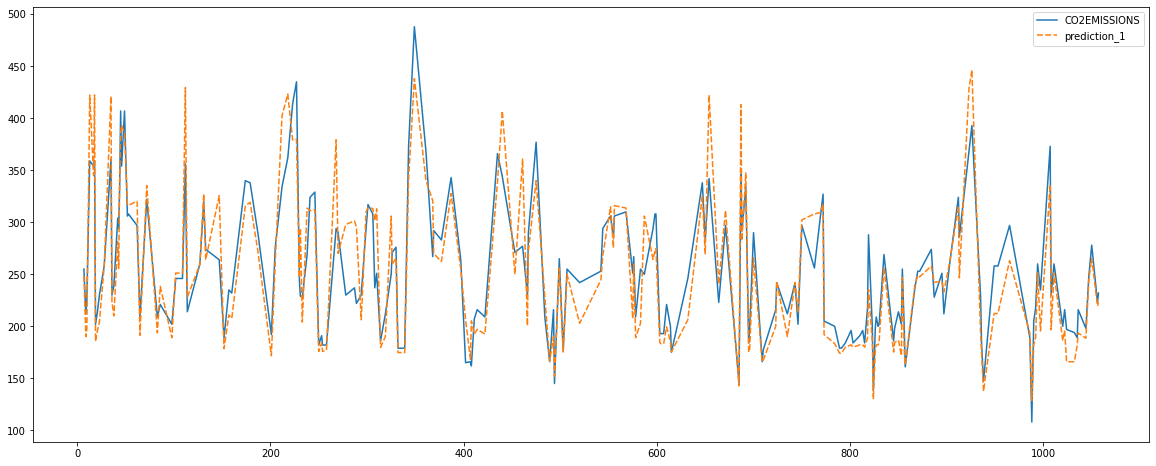

In [11]:
plt.figure(figsize=(20,8))
df_co2_pre_1 = df_test[['CO2EMISSIONS', 'prediction_1']]
sns.lineplot(data=df_co2_pre_1)

In [12]:
import sympy

x = sympy.Symbol('x')
y = sympy.Symbol('y')
z = sympy.Symbol('z')
theta = np.ones(4)
t = np.dot(np.array([1, x, y, z]), theta)
t


1.0*x + 1.0*y + 1.0*z + 1.0

In [13]:
# 3. Sử dụng Gradient Descent với 3 features Enginesize, Cylinders, FuelConsumption tính CO2 Emission
def gradient_descent_3(alpha, x, y, numIterations):
    m = x.shape[0]
    print('m:', m)
    theta = np.ones(x.shape[1])
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        theta0_prime = np.sum(loss)/m
        theta1_prime = np.sum(loss * x[:, 1])/m
        theta2_prime = np.sum(loss * x[:, 2])/m
        theta3_prime = np.sum(loss * x[:, 3])/m

        gradient = np.array([theta0_prime, theta1_prime, theta2_prime, theta3_prime])
        theta = theta - alpha * gradient
        if iter == 0:
            print('hypothesis:\n', hypothesis)
            print('loss:\n', loss)
            print('gradient:\n', gradient)
            print('theta:\n', theta)
    return theta

In [14]:
alpha = 0.00002
m, n = np.shape(X)
print('m', m)
print('n', n)
X = df_train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']]
print('X', X)
x = np.c_[np.ones(m), X]
print('x', x)
y = df_train['CO2EMISSIONS']
print('y', y)
theta = gradient_descent_3(alpha, x, y, 10000)

print('final theta', theta)

m 854
n 3
X       ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY
653          5.0          8                  17.2
983          3.5          6                  12.6
625          1.6          4                   9.8
277          3.6          6                  12.5
184          3.6          6                  14.8
...          ...        ...                   ...
1059         3.2          6                  11.9
317          2.0          4                   9.9
734          2.0          4                   9.1
488          1.8          4                   7.9
84           2.0          4                  10.6

[854 rows x 3 columns]
x [[ 1.   5.   8.  17.2]
 [ 1.   3.5  6.  12.6]
 [ 1.   1.6  4.   9.8]
 ...
 [ 1.   2.   4.   9.1]
 [ 1.   1.8  4.   7.9]
 [ 1.   2.   4.  10.6]]
y 653     347
983     258
625     205
277     242
184     294
       ... 
1059    235
317     198
734     179
488     161
84      209
Name: CO2EMISSIONS, Length: 854, dtype: int64
m: 854
hypothesis:
 [31.2 23.1 16.4 23

In [15]:
theta_zero = theta[0]
theta_engine_size = theta[1]
theta_cylinders = theta[2]
theta_fuel_consumption = theta[3]

df_test['prediction_2'] = df_test['ENGINESIZE']*theta_engine_size + df_test['CYLINDERS']*theta_cylinders + df_test['FUELCONSUMPTION_CITY']*theta_fuel_consumption + theta_zero
df_test.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS,prediction_1,prediction_2
7,2014.0,ACURA,TL AWD,3.7,6.0,12.8,255.0,248.436942,247.507365
9,2014.0,ACURA,TSX,2.4,4.0,10.6,212.0,190.114261,194.271053
10,2014.0,ACURA,TSX,2.4,4.0,11.2,225.0,197.051770,202.566440
13,2014.0,ASTON MARTIN,RAPIDE,5.9,12.0,18.0,359.0,422.358572,380.242709
17,2014.0,ASTON MARTIN,V8 VANTAGE S,4.7,8.0,18.1,354.0,345.275379,342.258882


In [16]:
from sklearn.metrics import r2_score
r2_result = r2_score(df_test['CO2EMISSIONS'], df_test['prediction_2'])
r2_result

0.7770440713621423